In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [13]:
mnist = keras.datasets.mnist
(x_train_orig, y_train), (x_test_orig, y_test) = mnist.load_data()
print("mnist dataset: train=%s test=%s" % (x_train_orig.shape, x_test_orig.shape))
# print("x_test[0] =", x_test[0])


# roate the images to enlarge the dataset
def rotate_images(arr, degree):
    img = Image.fromarray(arr)
    return np.array(img.rotate(degree))


x_train_rotated_left = [rotate_images(x, 20) for x in x_train_orig]
x_train_rotated_right = [rotate_images(x, 160) for x in x_train_orig]
x_test_rotated_left = [rotate_images(x, 20) for x in x_test_orig]
x_test_rotated_right = [rotate_images(x, 160) for x in x_test_orig]
x_train_orig = np.concatenate((x_train_orig, x_train_rotated_left, x_train_rotated_right), axis=0)
x_test_orig = np.concatenate((x_test_orig, x_test_rotated_left, x_test_rotated_right), axis=0)
y_train = np.concatenate((y_train, y_train, y_train), axis=0)
y_test = np.concatenate((y_test, y_test, y_test), axis=0)
print("dataset + roated images: train=%s test=%s y_train=%s y_test=%s" % (
    x_train_orig.shape, x_test_orig.shape, y_train.shape, y_test.shape))

mnist dataset: train=(60000, 28, 28) test=(10000, 28, 28)
dataset + roated images: train=(180000, 28, 28) test=(30000, 28, 28) y_train=(180000,) y_test=(30000,)


y = 2


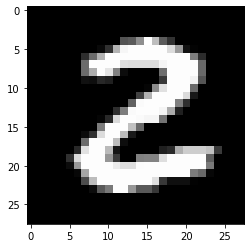

In [14]:
# Example of a picture
index = 25
plt.imshow(x_train_orig[index], cmap='gray')
print("y = " + str(y_train[index]))

y = 2


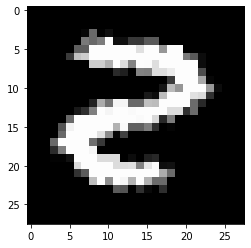

In [15]:
# Example of a rotated picture
plt.imshow(x_train_rotated_right[index], cmap='gray')
print("y = " + str(y_train[index]))

In [16]:
x_train, x_test = x_train_orig / 255.0, x_test_orig / 255.0  # normalizing
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        self.model.stop_training = logs.get('accuracy') > 0.993

In [ ]:
model.fit(x_train,
          y_train,
          epochs=50,
          callbacks=[myCallback()])

```
Epoch 49/50
180000/180000 [==============================] - 133s 739us/sample - loss: 0.0965 - accuracy: 0.9827
Epoch 50/50
180000/180000 [==============================] - 1042s 6ms/sample - loss: 0.1001 - accuracy: 0.9837
```

In [ ]:
model.evaluate(x_test, y_test)

```
8s 264us/sample - loss: 0.0880 - accuracy: 0.9830
[0.17592055468070897, 0.98296666]
```

In [20]:
# save as tflite model
tf.saved_model.save(model, 'models/mnist')
converter = tf.lite.TFLiteConverter.from_saved_model('models/mnist')
lite_model = converter.convert()
open('models/mnist/mnist.tflite', 'wb').write(lite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/digits_mnist/assets


11637864